In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

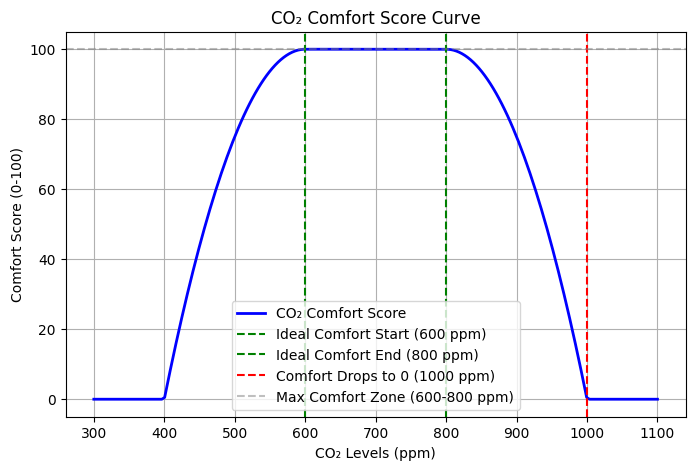

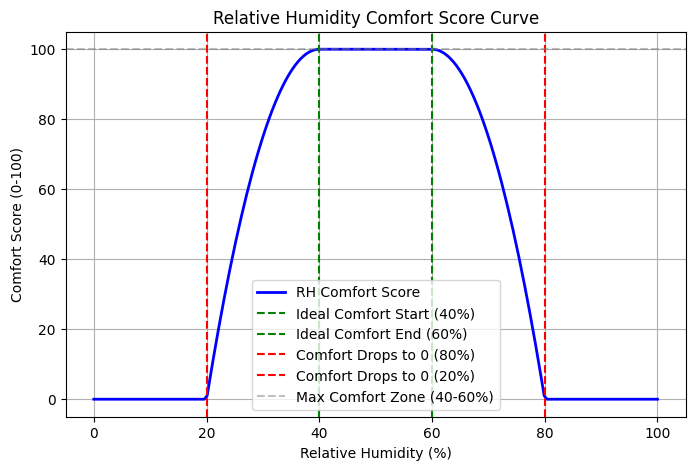

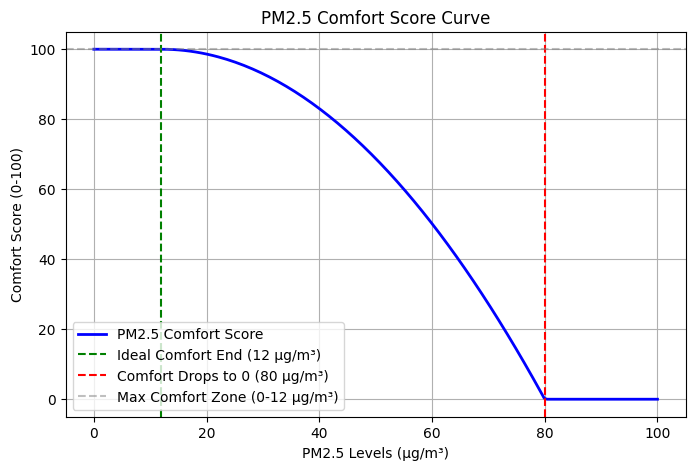

In [2]:
dfs = [pd.read_csv('datasets/madalena_merged/E145.csv'), pd.read_csv('datasets/madalena_merged/E146.csv'),pd.read_csv('datasets/madalena_merged/E147.csv'),pd.read_csv('datasets/madalena_merged/E148.csv'),]

def temperature_calc(temp):
    if temp <= 16 or temp >= 30:
        return 0
    elif 22 <= temp <= 24:
        return 100
    elif 16 < temp < 22:
        return 100 - ((temp - 22) / (22 - 16))**2 * 100  
    elif 24 < temp < 30:
        return 100 - ((temp - 24) / (30 - 24))**2 * 100 

def co2_comfort_score(co2):
    if co2 <= 400 or co2 >= 1000:
        return 0
    elif 600 <= co2 <= 800:
        return 100
    elif 400 < co2 < 600:
        return 100 - ((co2 - 600) / (600 - 400))**2 * 100 
    elif 800 < co2 < 1000:
        return 100 - ((co2 - 800) / (1000 - 800))**2 * 100  

co2_levels_fixed = np.linspace(300, 1100, 200)  
co2_scores_fixed = [co2_comfort_score(co2) for co2 in co2_levels_fixed]

plt.figure(figsize=(8, 5))
plt.plot(co2_levels_fixed, co2_scores_fixed, label="CO₂ Comfort Score", color="blue", linewidth=2)
plt.axvline(x=600, linestyle="--", color="green", label="Ideal Comfort Start (600 ppm)")
plt.axvline(x=800, linestyle="--", color="green", label="Ideal Comfort End (800 ppm)")
plt.axvline(x=1000, linestyle="--", color="red", label="Comfort Drops to 0 (1000 ppm)")
plt.axhline(y=100, linestyle="--", color="gray", alpha=0.5, label="Max Comfort Zone (600-800 ppm)")
plt.xlabel("CO₂ Levels (ppm)")
plt.ylabel("Comfort Score (0-100)")
plt.title("CO₂ Comfort Score Curve")
plt.legend()
plt.grid(True)

plt.show()

def rh_comfort_score(rh):
    if rh <= 20 or rh >= 80:
        return 0
    elif 40 <= rh <= 60:
        return 100
    elif 20 < rh < 40:
        return 100 - ((rh - 40) / (40 - 20))**2 * 100  
    elif 60 < rh < 80:
        return 100 - ((rh - 60) / (80 - 60))**2 * 100  

rh_levels = np.linspace(0, 100, 200)  
rh_scores = [rh_comfort_score(rh) for rh in rh_levels]


plt.figure(figsize=(8, 5))
plt.plot(rh_levels, rh_scores, label="RH Comfort Score", color="blue", linewidth=2)
plt.axvline(x=40, linestyle="--", color="green", label="Ideal Comfort Start (40%)")
plt.axvline(x=60, linestyle="--", color="green", label="Ideal Comfort End (60%)")
plt.axvline(x=80, linestyle="--", color="red", label="Comfort Drops to 0 (80%)")
plt.axvline(x=20, linestyle="--", color="red", label="Comfort Drops to 0 (20%)")
plt.axhline(y=100, linestyle="--", color="gray", alpha=0.5, label="Max Comfort Zone (40-60%)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Comfort Score (0-100)")
plt.title("Relative Humidity Comfort Score Curve")
plt.legend()
plt.grid(True)

plt.show()

def pm25_comfort_score(pm25):
    if pm25 >= 80:
        return 0
    elif pm25 <= 12:
        return 100
    else:
        return 100 - ((pm25 - 12) / (80 - 12))**2 * 100  

pm25_levels_fixed = np.linspace(0, 100, 200)  
pm25_scores_fixed = [pm25_comfort_score(pm25) for pm25 in pm25_levels_fixed]


plt.figure(figsize=(8, 5))
plt.plot(pm25_levels_fixed, pm25_scores_fixed, label="PM2.5 Comfort Score", color="blue", linewidth=2)
plt.axvline(x=12, linestyle="--", color="green", label="Ideal Comfort End (12 µg/m³)")
plt.axvline(x=80, linestyle="--", color="red", label="Comfort Drops to 0 (80 µg/m³)")
plt.axhline(y=100, linestyle="--", color="gray", alpha=0.5, label="Max Comfort Zone (0-12 µg/m³)")
plt.xlabel("PM2.5 Levels (µg/m³)")
plt.ylabel("Comfort Score (0-100)")
plt.title("PM2.5 Comfort Score Curve")
plt.legend()
plt.grid(True)

plt.show()


In [3]:
def calculate_overall_comfort(df):
    df['Temp_Score'] = df['T_in[°C]'].apply(temperature_calc)
    df['RH_Score'] = df['RH [%]'].apply(rh_comfort_score)
    df['CO2_Score'] = df['CO2[ppm]'].apply(co2_comfort_score)
    df['PM2.5_Score'] = df['PM2_5[ug/m3]'].apply(pm25_comfort_score)
    
    df['Thermal_Comfort'] = (df['Temp_Score'] + df['RH_Score']) / 2
    df['IAQ_Score'] = (df['CO2_Score'] + df['PM2.5_Score']) / 2
    
    df['Overall_Comfort'] = 0.5 * df['Thermal_Comfort'] + 0.5 * df['IAQ_Score']
    df.drop(columns=['Temp_Score', 'RH_Score', 'CO2_Score', 'PM2.5_Score', 'Thermal_Comfort', 'IAQ_Score'], inplace=True)

    return df
for index, df in enumerate(dfs):
    dfs[index] = calculate_overall_comfort(df)

In [28]:
dfs[0].shape

(2749, 13)

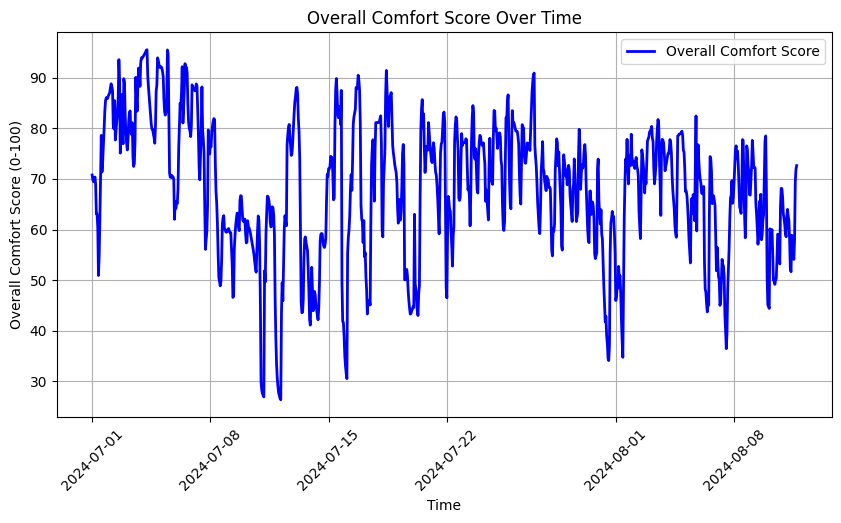

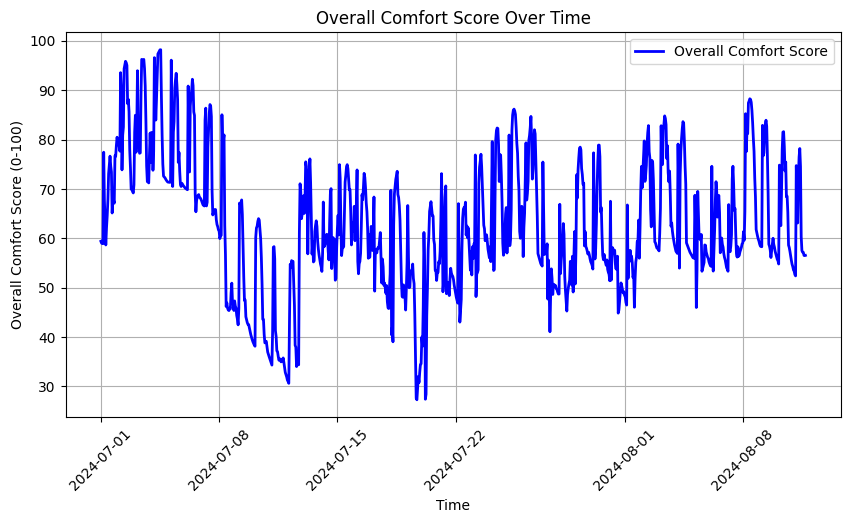

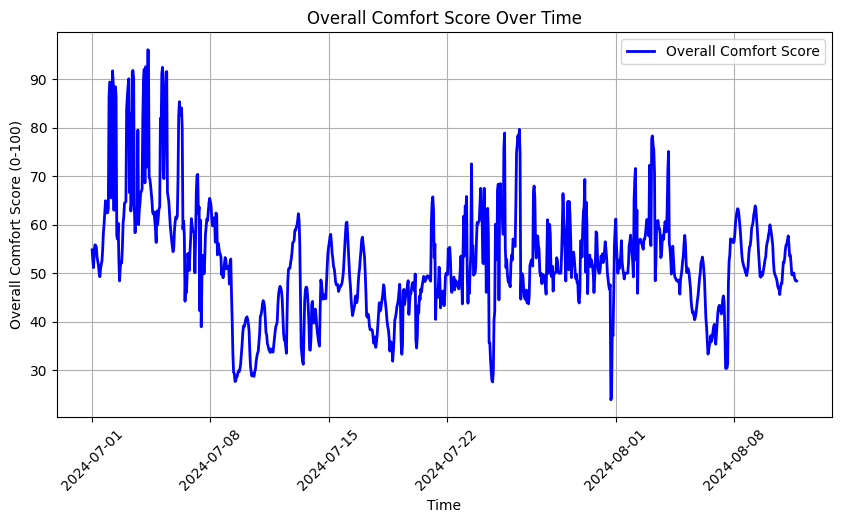

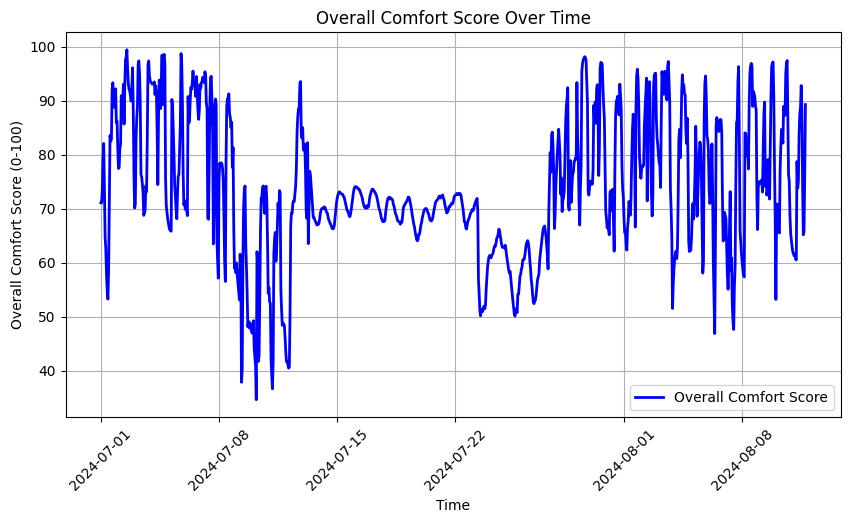

In [4]:
for df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df_temp = df[:1000]
    plt.figure(figsize=(10, 5))
    plt.plot(df_temp['timestamp'], df_temp['Overall_Comfort'], color='blue', linewidth=2, label="Overall Comfort Score")

    plt.xlabel("Time")
    plt.ylabel("Overall Comfort Score (0-100)")
    plt.title("Overall Comfort Score Over Time")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate timestamps for readability

    # Show the plot
    plt.show()

c:\Users\Kelsier\.conda\envs\thesis\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Kelsier\.conda\envs\thesis\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Kelsier\.conda\envs\thesis\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kelsier\.conda\envs\thesis\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Kelsier\.conda\envs\thesis\Lib\subprocess.py", line 1538, in 

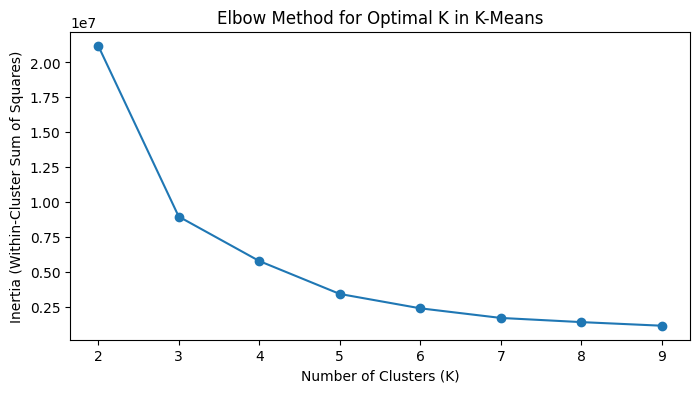

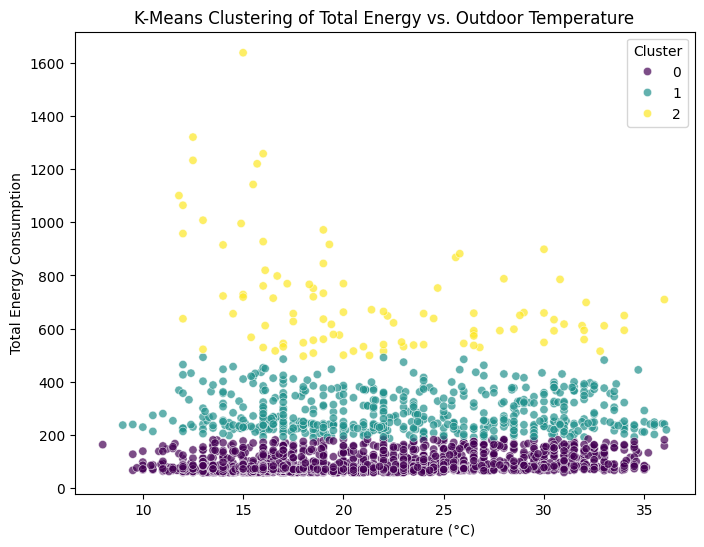

In [7]:
from sklearn.cluster import KMeans
import seaborn as sns

X = dfs[0][['total_energy', 'T_out [°C]']].dropna()  

inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K in K-Means")
plt.show()

optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
dfs[0]['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfs[0], x="T_out [°C]", y="total_energy", hue="cluster", palette="viridis", alpha=0.7)
plt.xlabel("Outdoor Temperature (°C)")
plt.ylabel("Total Energy Consumption")
plt.title("K-Means Clustering of Total Energy vs. Outdoor Temperature")
plt.legend(title="Cluster")
plt.show()


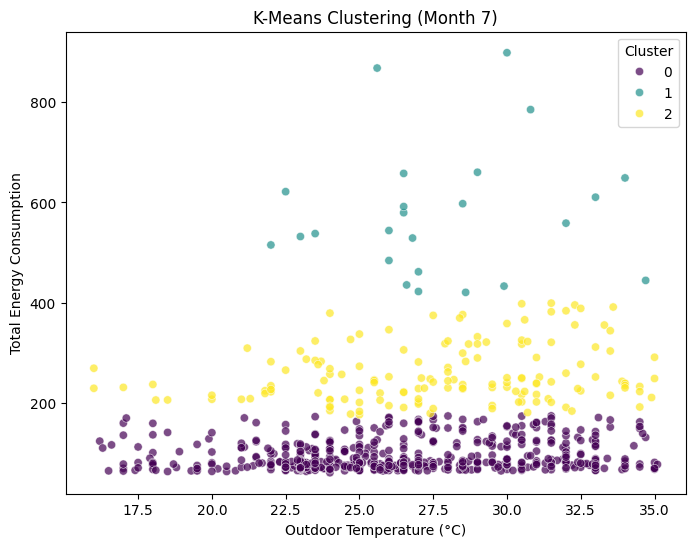

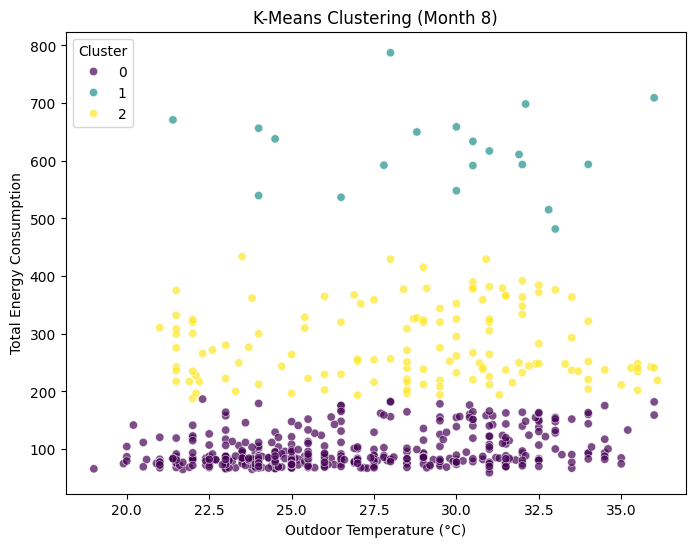

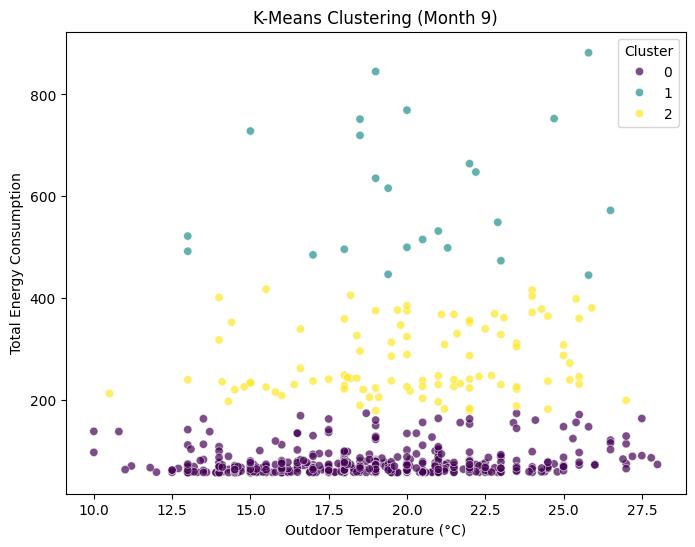

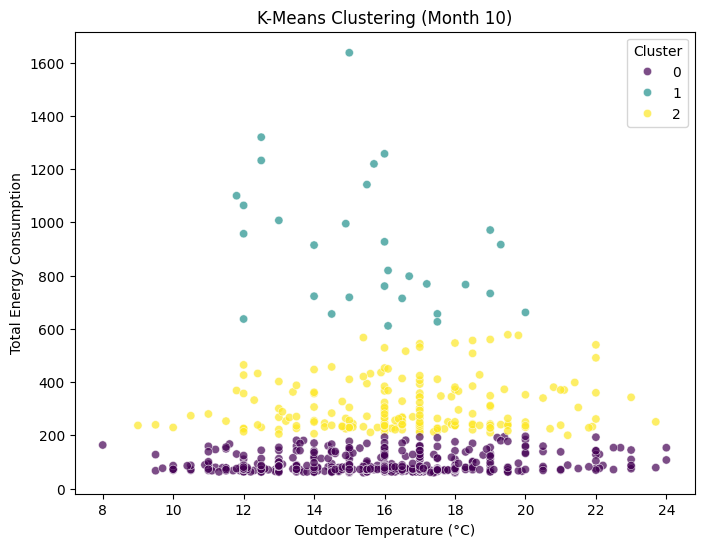

In [8]:
months = [7,8,9,10]
df = dfs[0]
for month in months:
    df['month'] = df['timestamp'].dt.month
    df_month = df[df['month'] == month].dropna(subset=['total_energy', 'T_out [°C]'])
        
    X = df_month[['total_energy', 'T_out [°C]']]

    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    df_month['cluster'] = kmeans.fit_predict(X)

    # Scatter plot for visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_month, x="T_out [°C]", y="total_energy", hue="cluster", palette="viridis", alpha=0.7)
    plt.xlabel("Outdoor Temperature (°C)")
    plt.ylabel("Total Energy Consumption")
    plt.title(f"K-Means Clustering (Month {month})")
    plt.legend(title="Cluster")
    plt.show()

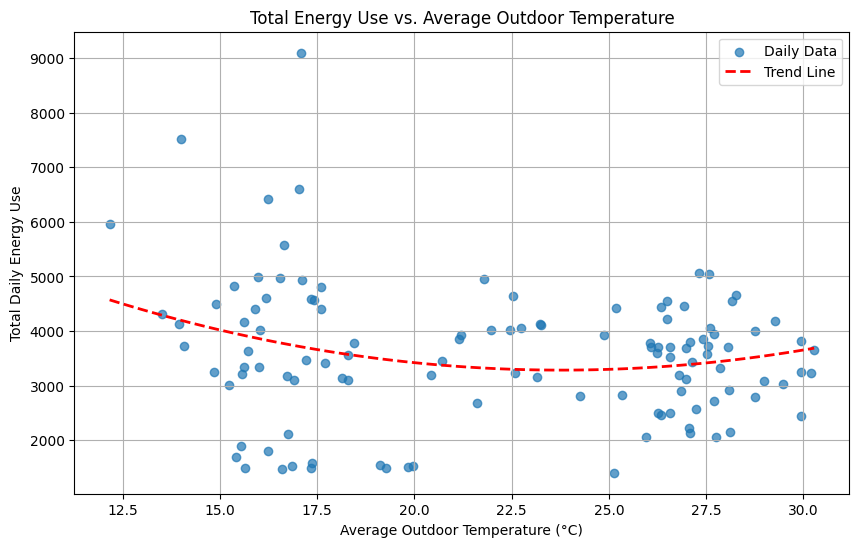

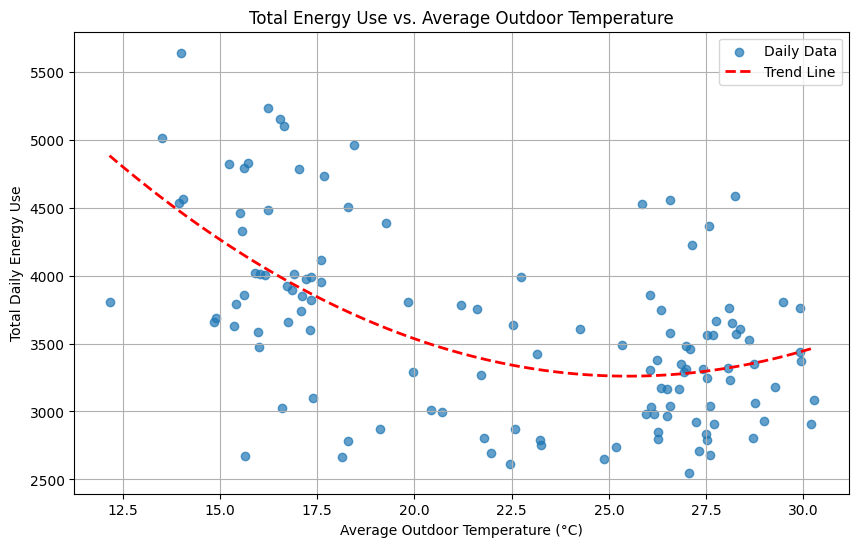

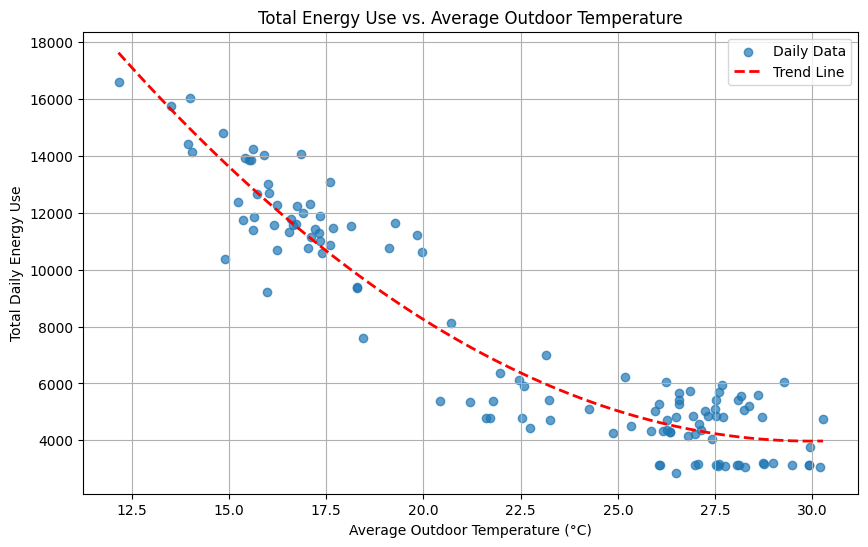

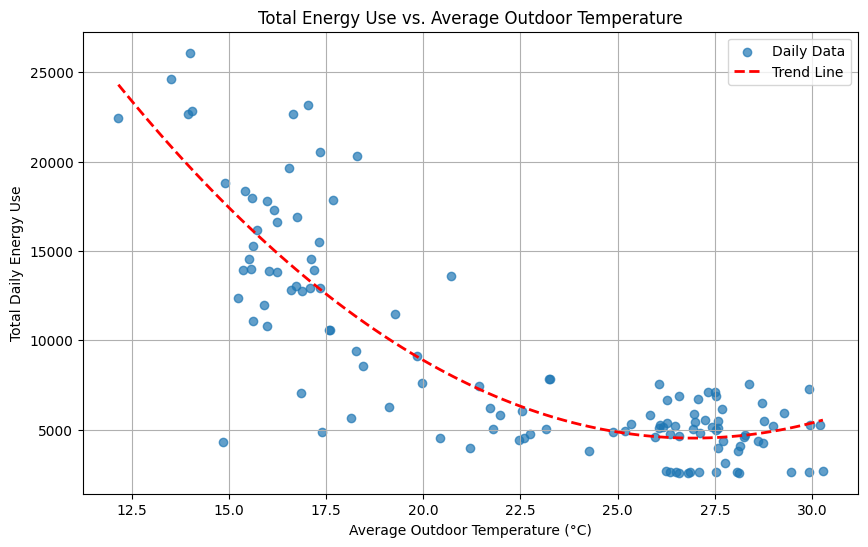

In [5]:
for df in dfs:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    df['date'] = df['timestamp'].dt.date

    daily_data = df.groupby('date').agg(
        total_energy=('total_energy', 'sum'),
        avg_temperature=('T_out [°C]', 'mean')
    ).reset_index()

    coeffs = np.polyfit(daily_data['avg_temperature'], daily_data['total_energy'], deg=2)
    poly_eq = np.poly1d(coeffs)

    x_smooth = np.linspace(daily_data['avg_temperature'].min(), daily_data['avg_temperature'].max(), 100)
    y_smooth = poly_eq(x_smooth)

    plt.figure(figsize=(10, 6))
    plt.scatter(daily_data['avg_temperature'], daily_data['total_energy'], alpha=0.7, label='Daily Data')
    plt.plot(x_smooth, y_smooth, color='red', linestyle='--', linewidth=2, label='Trend Line')
    plt.xlabel('Average Outdoor Temperature (°C)')
    plt.ylabel('Total Daily Energy Use')
    plt.title('Total Energy Use vs. Average Outdoor Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch [1/80], Loss: 0.3686
Epoch [2/80], Loss: 0.2317
Epoch [3/80], Loss: 0.2077
Epoch [4/80], Loss: 0.1868
Epoch [5/80], Loss: 0.1760
Epoch [6/80], Loss: 0.1760
Epoch [7/80], Loss: 0.1571
Epoch [8/80], Loss: 0.1307
Epoch [9/80], Loss: 0.1342
Epoch [10/80], Loss: 0.1142
Epoch [11/80], Loss: 0.1288
Epoch [12/80], Loss: 0.0965
Epoch [13/80], Loss: 0.1072
Epoch [14/80], Loss: 0.1033
Epoch [15/80], Loss: 0.1045
Epoch [16/80], Loss: 0.1018
Epoch [17/80], Loss: 0.0853
Epoch [18/80], Loss: 0.0929
Epoch [19/80], Loss: 0.1030
Epoch [20/80], Loss: 0.0907
Epoch [21/80], Loss: 0.0907
Epoch [22/80], Loss: 0.0959
Epoch [23/80], Loss: 0.0919
Epoch [24/80], Loss: 0.0729
Epoch [25/80], Loss: 0.0862
Epoch [26/80], Loss: 0.0771
Epoch [27/80], Loss: 0.0882
Epoch [28/80], Loss: 0.0695
Epoch [29/80], Loss: 0.0752
Epoch [30/80], Loss: 0.0712
Epoch [31/80], Loss: 0.0778
Epoch [32/80], Loss: 0.0768
Epoch [33/80], Loss: 0.0798
Epoch [34/80], Loss: 0.0754
Epoch [35/80], Loss: 0.0751
Epoch [36/80], Loss: 0.0755
E

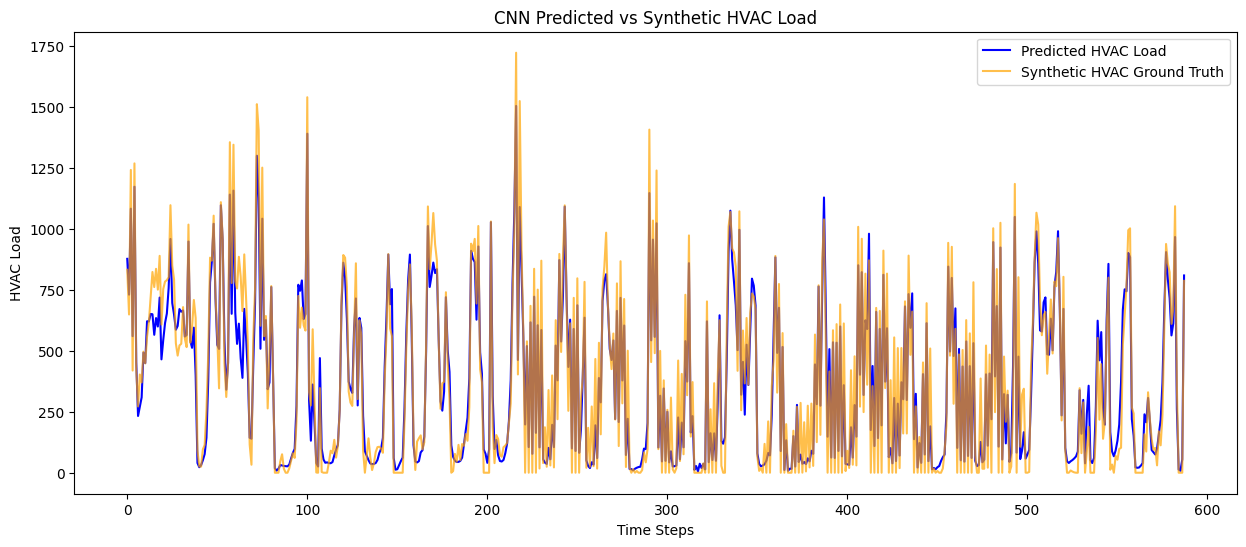

In [50]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

df = dfs[3].copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

mild_days = df[(df['T_out [°C]'] >= 20) & (df['T_out [°C]'] <= 25)]

baseline_load = mild_days.groupby(mild_days.index.hour)['total_energy'].mean()

df['baseline'] = df.index.hour.map(baseline_load)
df['synthetic_HVAC'] = (df['total_energy'] - df['baseline']).clip(lower=0)

features = df[['total_energy', 'T_out [°C]', 'T_in[°C]']]
target = df['synthetic_HVAC']

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1)).flatten()

window_size = 4
X, y = [], []
for i in range(window_size, len(features_scaled) - window_size):
    X.append(features_scaled[i-window_size:i+window_size+1])
    y.append(target_scaled[i])

X, y = np.array(X), np.array(y)

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class CNN_S2P(nn.Module):
    def __init__(self):
        super(CNN_S2P, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(3,2), padding=(1, 1)),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Conv2d(16, 32, kernel_size=(3,2), padding=(1,0)),
            nn.ReLU(),
            nn.Dropout(0.4)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 9 * 3, 64),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x.squeeze()


model = CNN_S2P()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

model.train()
for epoch in range(60):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/80], Loss: {total_loss:.4f}")

model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
predictions = model(X_test_tensor).detach().numpy()
predictions = scaler_target.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(15,6))
plt.plot(predictions, label='Predicted HVAC Load', color='blue')
plt.plot(y_test_actual, label='Synthetic HVAC Ground Truth', alpha=0.7, color='orange')
plt.xlabel('Time Steps')
plt.ylabel('HVAC Load')
plt.legend()
plt.title('CNN Predicted vs Synthetic HVAC Load')
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Display results
mae, rmse

(90.78432713578206, np.float64(126.3484922427281))

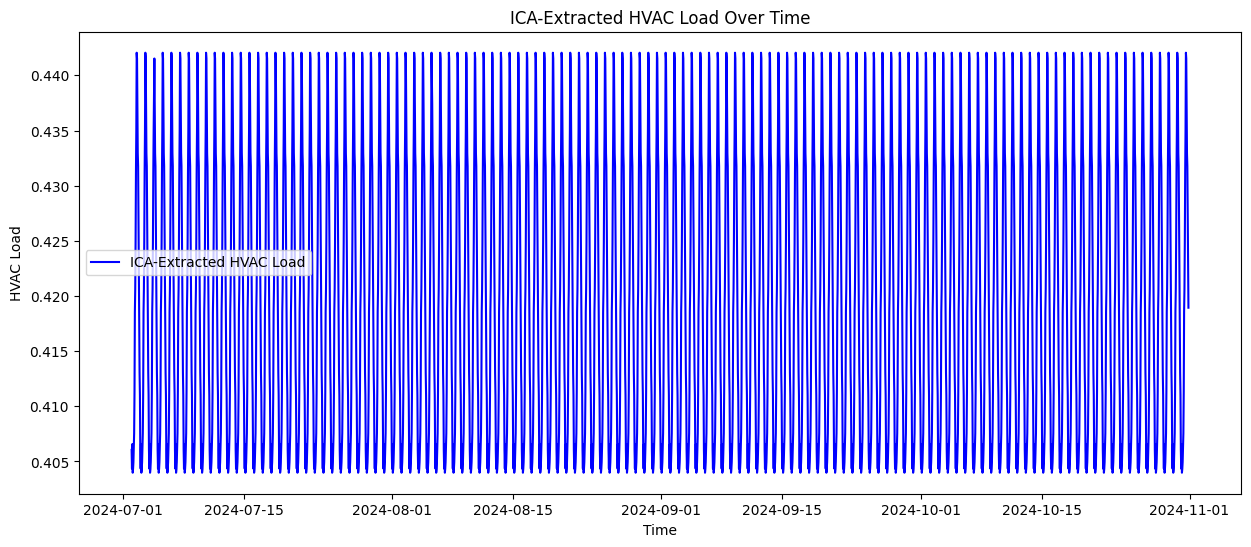

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import FastICA
# import matplotlib.pyplot as plt


# df = dfs[3].copy()
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace=True)


# mild_days = df[(df['T_out [°C]'] >= 18) & (df['T_out [°C]'] <= 24)]
# baseline_load = mild_days.groupby(mild_days.index.hour)['total_energy'].mean()

# df['baseline'] = df.index.hour.map(baseline_load)
# df['residual_load'] = df['total_energy'] - df['baseline'] 


# window_size = 24  
# X = []
# for i in range(len(df) - window_size):
#     X.append(df['residual_load'].iloc[i: i + window_size].values) 

# X = np.array(X) 


# n_components = min(2, X.shape[1])  
# ica = FastICA(n_components=n_components, random_state=42)
# components = ica.fit_transform(X)  

# df = df.iloc[window_size:] 
# df['ICA_1'] = components[:, 0]

# if n_components > 1:
#     df['ICA_2'] = components[:, 1]
#     hvac_component = 'ICA_1' if abs(df['ICA_1'].corr(df['T_out [°C]'])) > abs(df['ICA_2'].corr(df['T_out [°C]'])) else 'ICA_2'
# else:
#     hvac_component = 'ICA_1'

# df['HVAC_ICA'] = df[hvac_component].clip(lower=0)  

# hourly_hvac_bounds = df.groupby(df.index.hour)['HVAC_ICA'].mean()
# df['HVAC_ICA'] = df.index.hour.map(hourly_hvac_bounds)  

# plt.figure(figsize=(15, 6))
# plt.plot(df.index, df['HVAC_ICA'], label='ICA-Extracted HVAC Load', color='blue')
# plt.xlabel('Time')
# plt.ylabel('HVAC Load')
# plt.legend()
# plt.title('ICA-Extracted HVAC Load Over Time')
# plt.show()


C:\Users\Kelsier\AppData\Local\Temp\ipykernel_18868\1714498928.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_month['HVAC_ICA'] = df_last_month[hvac_component].clip(lower=0)
C:\Users\Kelsier\AppData\Local\Temp\ipykernel_18868\1714498928.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_month['HVAC_ICA_Scaled'] = df_last_month['HVAC_ICA'] * (hvac_avg_ratio * df_last_month['total_energy'].mean())


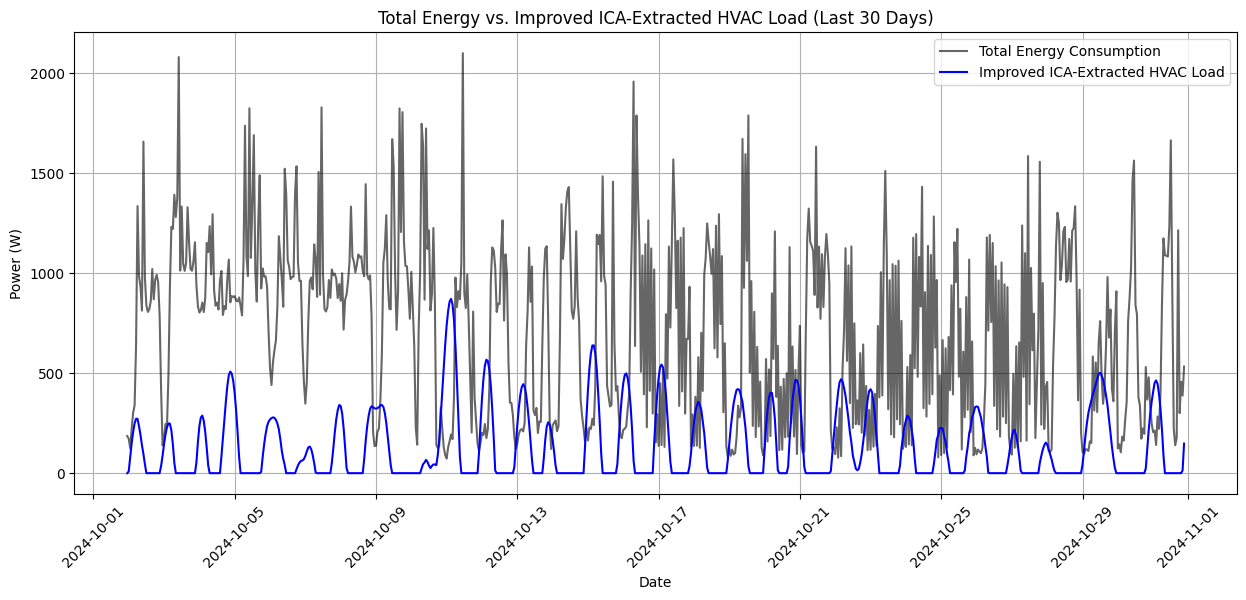

In [ ]:
# df = df.iloc[window_size:] 

# df_last_month = df.iloc[-30*24:]  

# fft_ica1 = np.fft.fft(df_last_month['ICA_1'])
# fft_ica2 = np.fft.fft(df_last_month['ICA_2']) if 'ICA_2' in df_last_month else None

# hvac_component = 'ICA_1'
# if fft_ica2 is not None and np.abs(fft_ica2[24]).sum() > np.abs(fft_ica1[24]).sum():
#     hvac_component = 'ICA_2'

# df_last_month['HVAC_ICA'] = df_last_month[hvac_component].clip(lower=0)

# hvac_avg_ratio = 0.4  
# df_last_month['HVAC_ICA_Scaled'] = df_last_month['HVAC_ICA'] * (hvac_avg_ratio * df_last_month['total_energy'].mean())

# plt.figure(figsize=(15, 6))
# plt.plot(df_last_month.index, df_last_month['total_energy'], label='Total Energy Consumption', color='black', alpha=0.6)
# plt.plot(df_last_month.index, df_last_month['HVAC_ICA_Scaled'], label='Improved ICA-Extracted HVAC Load', color='blue')

# plt.xlabel('Date')
# plt.ylabel('Power (W)')
# plt.title('Total Energy vs. Improved ICA-Extracted HVAC Load (Last 30 Days)')
# plt.legend()
# plt.xticks(rotation=45)
# plt.grid()

# plt.show()

C:\Users\Kelsier\AppData\Local\Temp\ipykernel_18868\1689573639.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['filtered_energy'].interpolate(inplace=True)
C:\Users\Kelsier\AppData\Local\Temp\ipykernel_18868\1689573639.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filte

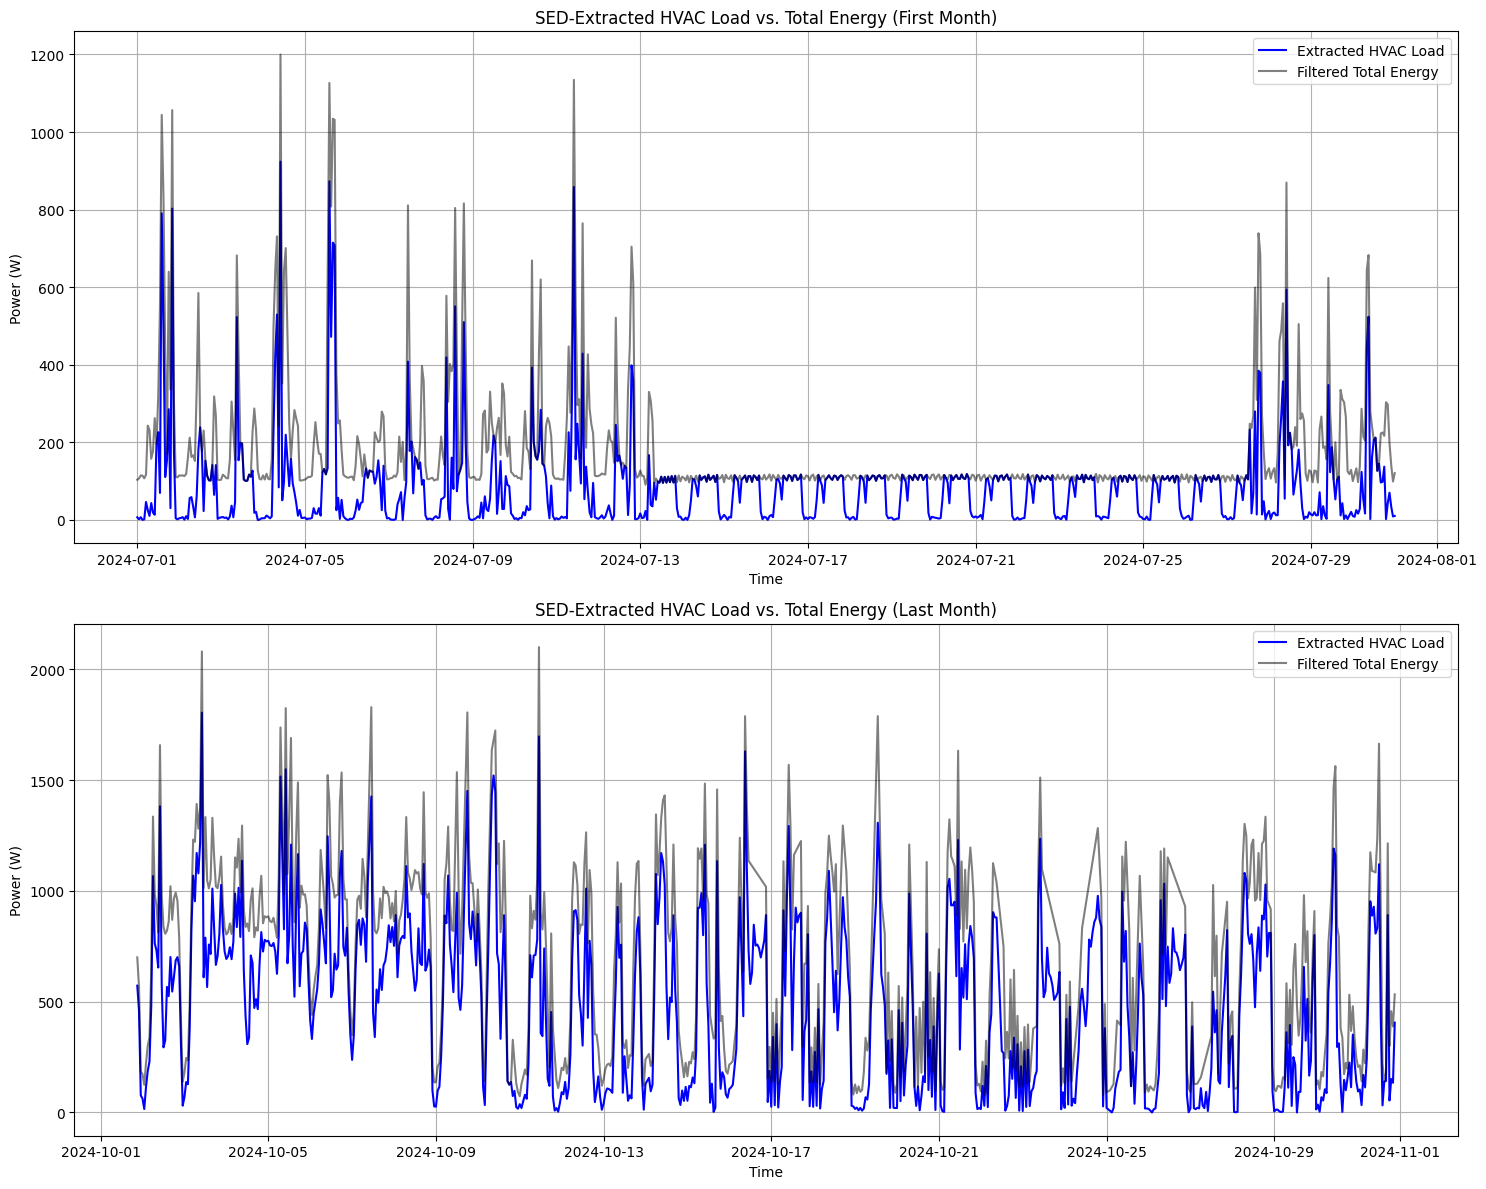

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = dfs[3].copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

def detect_large_loads(df, rise_threshold=500, drop_threshold=500, duration=2):
    df['load_change'] = df['total_energy'].diff().abs()
    df['is_large_load'] = (df['load_change'] > rise_threshold) & (df['load_change'].shift(-duration) > drop_threshold)
    df['filtered_energy'] = np.where(df['is_large_load'], np.nan, df['total_energy'])
    df['filtered_energy'].interpolate(inplace=True)
    return df

df = detect_large_loads(df)

mild_threshold_low = 20  
mild_threshold_high = 25

df['day_type'] = 'mild'
df.loc[df['T_out [°C]'] < mild_threshold_low, 'day_type'] = 'cold'
df.loc[df['T_out [°C]'] > mild_threshold_high, 'day_type'] = 'hot'

df_filtered = df.loc[~((df.index >= '2024-07-13') & (df.index <= '2024-07-28'))]

df_filtered['hour'] = df_filtered.index.hour  
df['hour'] = df.index.hour  


mild_avg = df_filtered[df_filtered['day_type'] == 'mild'].groupby('hour')['filtered_energy'].median()
hot_avg = df_filtered[df_filtered['day_type'] == 'hot'].groupby('hour')['filtered_energy'].median()
cold_avg = df_filtered[df_filtered['day_type'] == 'cold'].groupby('hour')['filtered_energy'].median()


df['mild_avg'] = df['hour'].map(mild_avg)
df['hot_avg'] = df['hour'].map(hot_avg)
df['cold_avg'] = df['hour'].map(cold_avg)


df['HVAC_cooling'] = np.maximum(0, df['filtered_energy'] - df['mild_avg'])
df['HVAC_heating'] = np.maximum(0, df['mild_avg'] - df['filtered_energy'])  

df['HVAC_total'] = df['HVAC_cooling'] + df['HVAC_heating']

df['HVAC_total'] = np.minimum(df['HVAC_total'], df['filtered_energy'])

fig, axes = plt.subplots(2, 1, figsize=(15,12))

first_month = df.loc[df.index.min():df.index.min() + pd.DateOffset(days=30)]
axes[0].plot(first_month.index, first_month['HVAC_total'], label='Extracted HVAC Load', color='blue')
axes[0].plot(first_month.index, first_month['filtered_energy'], label='Filtered Total Energy', color='black', alpha=0.5)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Power (W)')
axes[0].legend()
axes[0].set_title('SED-Extracted HVAC Load vs. Total Energy (First Month)')
axes[0].grid()

last_month = df.loc[df.index.max() - pd.DateOffset(days=30):df.index.max()]
axes[1].plot(last_month.index, last_month['HVAC_total'], label='Extracted HVAC Load', color='blue')
axes[1].plot(last_month.index, last_month['filtered_energy'], label='Filtered Total Energy', color='black', alpha=0.5)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Power (W)')
axes[1].legend()
axes[1].set_title('SED-Extracted HVAC Load vs. Total Energy (Last Month)')
axes[1].grid()

plt.tight_layout()
plt.show()